In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import xesmf as xe
import os
import sys
from pathlib import Path
from tqdm import tqdm

from scipy.stats import boxcox

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

ERA_DATA_PATH = str(HOME / 'system_tests/data/ERA5')

from dsrnngan.data import load_imerg_raw, load_hdf5_file, filter_by_lat_lon
from dsrnngan.plots import plot_precipitation

ImportError: cannot import name 'plot_precipitation' from 'dsrnngan.plots' (/user/home/uz22147/repos/downscaling-cgan/dsrnngan/plots.py)

In [9]:
import random
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from tqdm import tqdm

from dsrnngan.data import order_coordinates
from matplotlib import colorbar, colors, gridspec

year = 2018
# month = random.choice(np.arange(1, 12, 1))
month = 3 # Use one of the rainier months
# day = 4
# hour = 20
hours =range(0, 24, 1)

# fig, ax = plt.subplots(len(hours), 1, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(40, 40))

rainfall_percentages = []
null_values_dict = {}

n = 0
for day in tqdm(range(1, 5)):
    for hour in hours:
        for half_hour in [0, 1]:
            
            if half_hour == 0:
                suffix = f'-S{hour:02d}0000-E{hour:02d}2959.*'
            else:
                suffix = f'-S{hour:02d}3000-E{hour:02d}5959.*'
            imerg_fps = glob.glob(f'/bp1/geog-tropical/data/Obs/IMERG/half_hourly/final/3B-HHR.MS.MRG.3IMERG.{year}{month:02d}{day:02d}{suffix}')

            latitude_vals=np.arange(-12, 13, 0.1)
            longitude_vals=np.arange(25, 50, 0.1)
            # latitude_vals=np.arange(0 + 1e-5, 2 + 1e-5, 0.1)
            # longitude_vals=np.arange(29+ 1e-5, 31+ 1e-5, 0.1)
            # latitude_vals=np.arange(0 , 2, 0.1)
            # longitude_vals=np.arange(29, 31, 0.1)

            ds_raw = load_hdf5_file(imerg_fps[0])
            ds_raw = order_coordinates(ds_raw)

            ds = filter_by_lat_lon(ds_raw, lat_range=latitude_vals, lon_range=longitude_vals)
            
            # fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
            im, ax = plot_precipitation(ds, 'precipitationCal', log_precip=True, ax=ax, fig=fig, tick_interval=1)
            # ax.pcolormesh(ds['precipitationCal'][0, :, :], vmin=0, vmax=5)
 
            if half_hour == 0:
                title_time = f'{hour:02d}:00:00'
            else:
                title_time = f'{hour:02d}:30:00'
            plt.title(f'iMERG: {year}-{month:02d}-{day:02d} {title_time}')
            cbar = plt.colorbar(im, ax=ax)

            cbar.ax.set_ylabel('precipitation estimate (mm/hr)')
            plt.savefig(f'figs/test_{n}.jpg')
            plt.show()
            raise ValueError
            
            n +=1
            
            null_values_dict[hour] = np.isnan(ds['precipitationCal'].values).sum() /  len( ds['precipitationCal'].values.flatten())
            
            precip = ds_raw['precipitationCal'].isel(time=0).values
            # print((precip > 0.1).mean())
            rainfall_percentages.append((precip > 0.1).mean())
            
            # era5_ds = load_era5_day_raw('tp', year, month, day, latitude_vals=latitude_vals, longitude_vals=longitude_vals,
            #                     interpolate=True)
            # era5_ds = order_coordinates(era5_ds)
            # era5_ds['tp'] = 1000 * era5_ds['tp'] / 24 # roughly mm/hr
            # plot_precipitation(era5_ds, 'tp', log_precip=True, ax=ax[1], fig=fig,
            #                 lat_var_name='latitude', lon_var_name='longitude')


  0%|          | 0/4 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#  Create video
import cv2
import numpy as np
import glob

img_array = []
for m in range(n):
    filename = f'figs/test_{m}.jpg'
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('imerg_precip.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


In [ ]:
# Get an idea of distribution of rainfall
from calendar import monthrange

all_dates = []
for year in [2018]:
    for month in np.arange(1, 13):
        for day in range(1, monthrange(year, month)[1]+1):
            all_dates.append((year, month, day))

In [ ]:
from dsrnngan.data import RADAR_PATH
from datetime import datetime

year = 2018
month = 12
day = 31
hour = 12
dt_start = datetime(year, month, day, hour, 0, 0)

hourly_glob_str = os.path.join(RADAR_PATH, '3B-HHR.MS.MRG.3IMERG.' + dt_start.strftime('%Y%m%d-S%H*'))
fps = glob(hourly_glob_str)
print(hourly_glob_str)


[autoreload of dsrnngan.data failed: Traceback (most recent call last):
  File "/user/work/uz22147/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/user/work/uz22147/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/user/work/uz22147/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/user/home/uz22147/repos/downscaling-cgan/dsrnngan/data.py", line 501, in <module>
    def get_era5_filepath_prefix(variable, era_data_dir=RAW_FCST_PATH,
NameError: name 'RAW_FCST_PATH' is not defined
]


TypeError: 'module' object is not callable

In [ ]:
latitude_vals=np.arange(-12, 13, 0.1)
longitude_vals=np.arange(25, 50, 0.1)

# Get an idea of distribution of rainfall
from calendar import monthrange

all_dates = []
for year in [2018]:
    for month in np.arange(1, 13):
        for day in [1, 4, 8, 12, 16, 20]:
            for hour in [6, 12, 18]:
                all_dates.append((year, month, day, hour))

datasets = []
for (year, month, day, hour) in tqdm(all_dates, total=len(all_dates)):
    tmp_ds = load_imerg_raw(year, month, day, hour,
                        latitude_vals=latitude_vals, longitude_vals=longitude_vals)
    datasets.append(tmp_ds)
ds = xr.concat(datasets, dim='time')

100%|██████████| 216/216 [08:55<00:00,  2.48s/it]


(array([2.4766565e+07, 3.8401000e+05, 2.7391600e+05, 2.1651700e+05,
        1.8217800e+05, 1.5271600e+05, 1.3083300e+05, 1.1425900e+05,
        1.0068400e+05, 8.8350000e+04, 7.6914000e+04, 6.7857000e+04,
        6.0459000e+04, 5.3075000e+04, 4.7660000e+04, 4.1965000e+04,
        3.5881000e+04, 3.1538000e+04, 2.7647000e+04, 2.4572000e+04,
        2.0687000e+04, 1.7656000e+04, 1.4730000e+04, 1.2433000e+04,
        1.0698000e+04, 8.5620000e+03, 7.2900000e+03, 6.1580000e+03,
        5.0360000e+03, 4.1360000e+03, 3.3080000e+03, 2.5340000e+03,
        2.0160000e+03, 1.6060000e+03, 1.3080000e+03, 1.0550000e+03,
        7.5200000e+02, 6.7300000e+02, 4.6200000e+02, 3.0000000e+02,
        2.7400000e+02, 1.8800000e+02, 1.4600000e+02, 1.5900000e+02,
        8.1000000e+01, 8.5000000e+01, 3.7000000e+01, 2.3000000e+01,
        9.0000000e+00, 2.0000000e+00]),
 array([0.        , 0.03876028, 0.07752056, 0.11628083, 0.15504111,
        0.19380139, 0.23256166, 0.27132195, 0.31008223, 0.3488425 ,
        

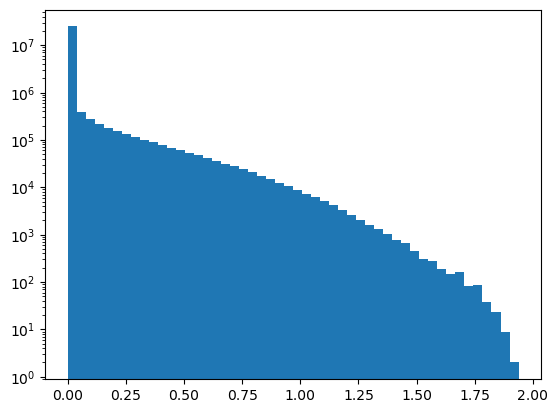

In [ ]:
import matplotlib.pyplot as plt

precip_vals = np.log10(1 + ds['precipitationCal'].values.flatten())

plt.hist(precip_vals, bins=50, log=True)

In [25]:
import pickle

with open('../total_rainfall.pkl', 'rb') as ifh:
    total_rainfall_dict = pickle.load(ifh)


with open('../monthly_rainfall.pkl', 'rb') as ifh:
    monthly_rainfall_dict = pickle.load(ifh)
    
with open('../monthly_rainfall_era5.pkl', 'rb') as ifh:
    monthly_rainfall_era5_dict = pickle.load(ifh)

In [86]:
# Get monthly totals 
fp =  '/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/monthly/201703_total.nc'

ds = xr.load_dataset(fp)

fp_day = '/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/half_hourly/final/3B-HHR.MS.MRG.3IMERG.20170320-S063000-E065959.0390.V06B.nc'
ds_day = xr.load_dataset(fp_day)


In [89]:
ds_day['precipitationCal'].max() * 30 * 24

<xarray.DataArray 'precipitationCal' ()>
array(25075.01678467)

In [38]:
total = None
for day in range(1, 31):
    for hour in range(1,24):
        ds_day_2 = load_imerg_raw(2017, 3, day, hour)
        if total is None:
            total = ds_day_2['precipitationCal'].values
        else:
            total += ds_day_2['precipitationCal'].values

In [79]:
from dsrnngan.data import get_imerg_filepaths

fps = []
for day in range(1, 31):
    for hour in range(0, 24):
        tmp = get_imerg_filepaths(2017, 3, day, hour, file_ending='.nc')
        fps += tmp

In [13]:
import pickle

with open('/user/home/uz22147/repos/downscaling-cgan/rainfall_data/monthly_rainfall_2017.pkl', 'rb') as ifh:
    total_rainfall_dict = pickle.load(ifh)

In [4]:
# Calculate monthly averages from monthly averaged data
from glob import glob
from tqdm import tqdm
from calendar import monthrange

latitude_vals = np.arange(-12.05, 16.05, 0.1)
longitude_vals = np.arange(22.05, 50.05, 0.1)

monthly_total_mean = {}
monthly_rate_mean = {}

for month in tqdm(range(1, 13)):

    fps = glob(f'/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/monthly/*{month:02d}_total.nc')

    monthly_tot = None
    n_tot = 0
    for fp in fps:

        # year = fp.split('/')[-1][:4]
        ds = xr.load_dataset(fp)
        ds = ds.sel(lat=latitude_vals).sel(lon=longitude_vals)

        vals = ds['precipitationCal'].values[0, :, :] / 2 # factor of 2 to have to account for double counting since it is half hourly

        # n_month_days = monthrange(2020, 1)[1]
        # vals = vals * n_month_days * 24

        # multiply up to get sum of hourly rainfall for the month
        if monthly_tot is None:
            monthly_tot = np.zeros(vals.shape)

        monthly_tot += vals
        n_tot += 1
        ds.close()

    monthly_total_mean[month] = monthly_tot / n_tot


100%|██████████| 12/12 [00:06<00:00,  1.74it/s]


In [5]:
# # Load monthly data
# import numpy as np
# import xarray as xr
# from calendar import monthrange

# monthly_rainfall_dict = {}
# monthly_dir = '/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/monthly'
# for year in np.arange(2007, 2021, 1):
#     monthly_rainfall_dict[year] = {}
#     for month in np.arange(1, 13):
#         month_data = xr.load_dataset(os.path.join(monthly_dir, f'{year}{month:02d}.nc'))
#         monthly_rainfall_dict[year][month] = month_data['precipitationCal']

FileNotFoundError: [Errno 2] No such file or directory: b'/bp1/geog-tropical/users/uz22147/east_africa_data/IMERG/monthly/201112.nc'

In [27]:
# # Get average monthly rainfall from yearly data
# import numpy as np
# from calendar import monthrange
# monthly_total = {m: np.zeros([112, 112]) for m in np.arange(1,13)}
# monthly_total_era5 = {m: np.zeros([112, 112]) for m in np.arange(1,13)}

# for year, month_vals in monthly_rainfall_dict.items():
#     for month, month_data in month_vals.items():
#         monthly_total[month] += month_data.values
        
# for year, month_vals in monthly_rainfall_era5_dict.items():
#     for month, month_data in month_vals.items():
#         monthly_total_era5[month] += month_data

# all_years = list(monthly_rainfall_dict.keys())
# num_years = len(monthly_rainfall_dict.keys())

# # Take averages
# avg_monthly_rainfall = {k: v/num_years for k, v in monthly_total.items()}

# all_era5_years = list(monthly_rainfall_era5_dict.keys())
# num_era5_years = len(monthly_rainfall_era5_dict.keys())

# # Take averages
# avg_monthly_rainfall_era5 = {k: v/num_era5_years for k, v in monthly_total_era5.items()}

# # get alternative view from adding up daily values
# monthly_totals = {}
# for year in all_years:
#     monthly_totals[year] = {}
#     for month in np.arange(1, 13):
#         monthly_totals[year][month] = np.zeros((112, 112))
#         for day in range(1, monthrange(year, month)[1]+1):
#             monthly_totals[year][month] += total_rainfall_dict[year][month][day].values


In [8]:
import os
import pickle
from pathlib import Path
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import numpy as np
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from matplotlib import colorbar, colors, gridspec

HOME = Path(os.getcwd()).parents[0]

sys.path.insert(1, str(HOME))

from dsrnngan.rapsd import plot_spectrum1d, rapsd
from dsrnngan.thresholded_ranks import findthresh
from dsrnngan.plots import plot_img_log_coastlines, plot_precip
from dsrnngan import data

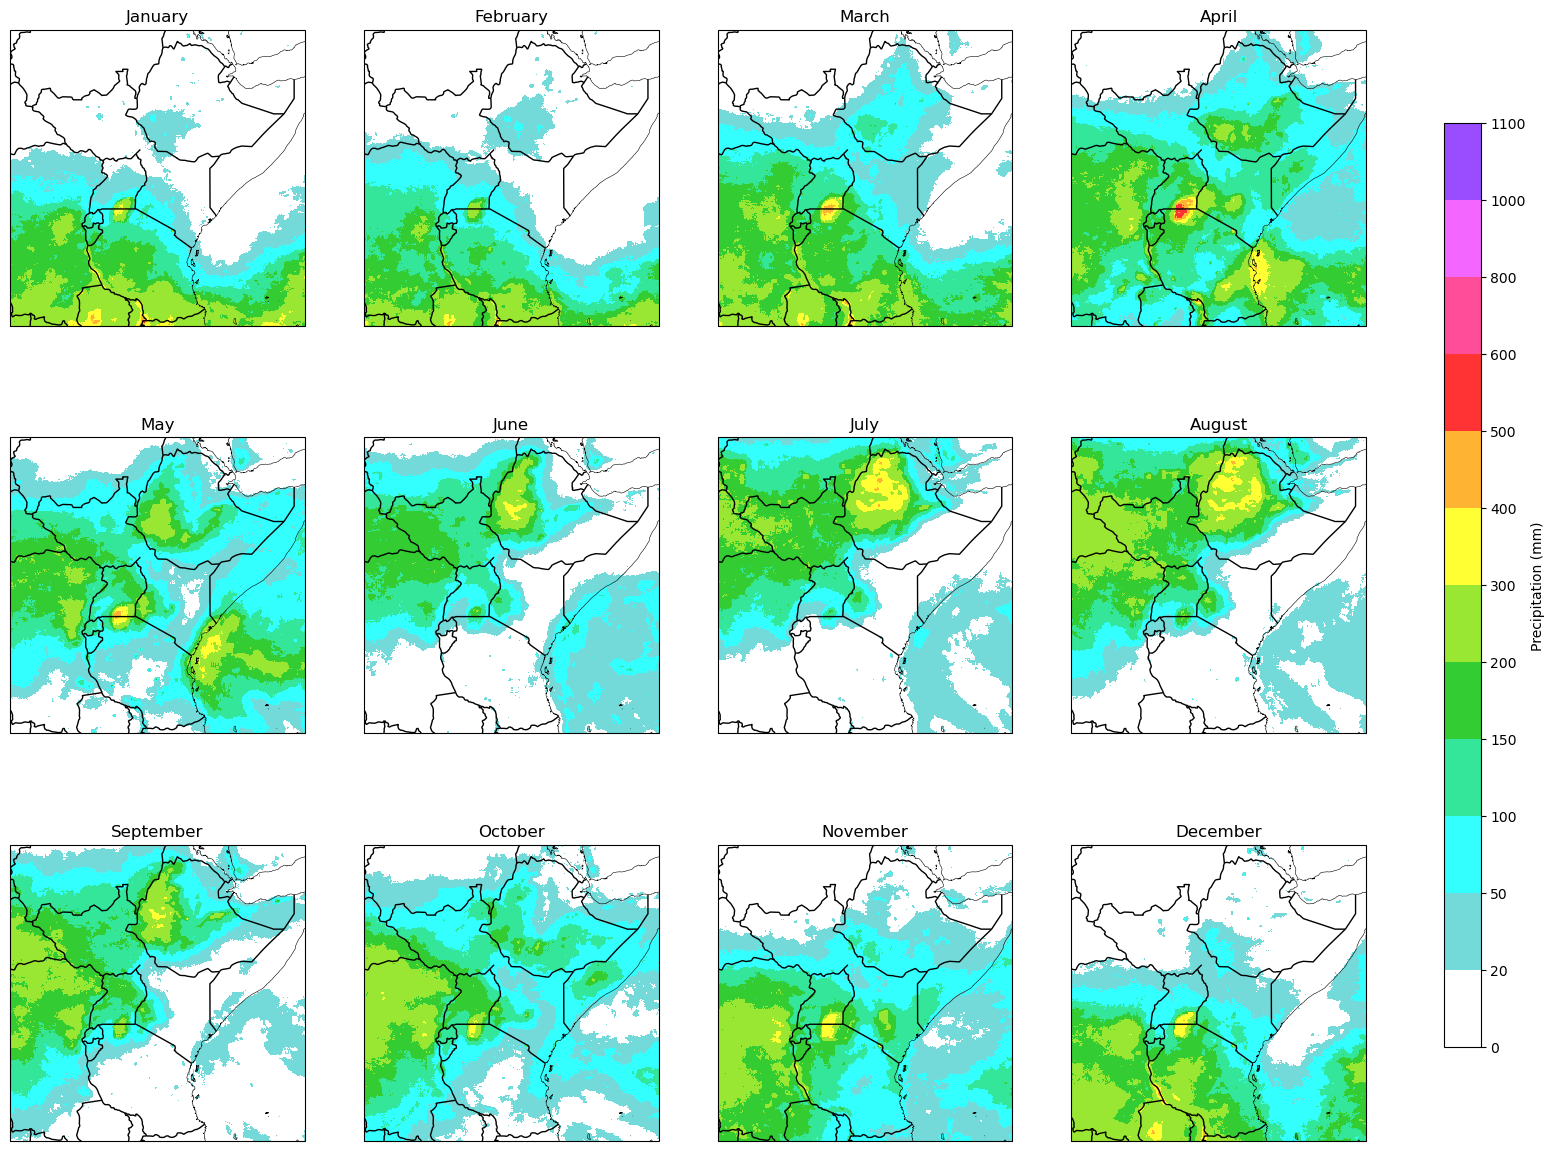

In [44]:
import matplotlib
import metpy
from metpy import plots as metpy_plots
from datetime import date

precip_clevs = [0, 20, 50, 100, 150, 200, 300, 400, 500, 600, 800, 1000, 1100]


palette="GnBu"
linewidth = 0.4
# cmap = ListedColormap(sns.color_palette(palette, 256))
# cmap.set_under('white')
# cmap.set_extremes(under=0.01, over=1)
extent = [min(longitude_vals), max(longitude_vals), min(latitude_vals), max(latitude_vals)]

alpha = 0.8
spacing = 10
units = "Rain rate [mm h$^{-1}$]"
cb_tick_loc = np.array([0.1, 0.5, 1, 2, 5, 15, 30, 50])
cb_tick_labels = [0.1, 0.5, 1, 2, 5, 15, 30, 50]
value_range_precip=(0.01, 1)
num_cols = 4
num_rows = 3
figsize = (num_cols*5, num_rows*5)
# plt.figure(figsize=figsize)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize, 
                        subplot_kw={'projection': ccrs.PlateCarree()})

for month in np.arange(1, 13):
    
    # row = month -1
    row = (month-1) // num_cols
    col = month-1 - (row) * num_cols

    max_val = monthly_total_mean[month].max()
    axs[row, col].coastlines(resolution='10m', color='black', linewidth=linewidth)

    im = plot_precip(np.transpose( monthly_total_mean[month]), ax=axs[row, col],
                     levels=precip_clevs)
    # im = axs[row, col].contourf(longitude_vals, latitude_vals , np.transpose(monthly_means[month]), transform=ccrs.PlateCarree(),
    #                     cmap='Greys')
    
    axs[row, col].set_title(date(2020, month, 1).strftime('%B'))
        
    # axs[row, 1].coastlines(resolution='10m', color='black', linewidth=linewidth)
    # im = axs[row, 1].contourf(longitude_vals, latitude_vals , avg_monthly_rainfall_era5[month][ :,:], transform=ccrs.PlateCarree(),
    #                     cmap='Greys', levels=np.linspace(0, 650, 15))
    # axs[row, 1].set_title(date(2020, month, 1).strftime('%B') + ' ERA-5')
    # plot_img_log_coastlines(avg_monthly_rainfall[month][ :,:], value_range_precip=value_range_precip,
    #                                     cmap=cmap,
    #                                     extent=extent,
    #                                     alpha=alpha)
    # plt.colorbar(im)



# cbar_ax = fig.add_axes([1.05, 0.0, 0.05, 0.95])
# cb = matplotlib.colorbar.Colorbar(cbar_ax, cmap=precip_cmap, norm=precip_norm)
cb = plt.colorbar(im, ax=axs, shrink=0.8, aspect=25, fraction=0.075)
cb.ax.set_yticks(precip_clevs)
cb.ax.set_yticklabels(precip_clevs)
cb.ax.tick_params(axis='both', which='major')
cb.ax.set_ylabel("Precipitation (mm)")

plt.savefig('Month_averages.png')


In [76]:
### Timing the load imerg function

from dsrnngan.data import load_imerg

In [77]:
ds = load_imerg('20181230', 18, data_dir='/home/uz22147/repos/downscaling-cgan/system_tests/data/IMERG/half_hourly/final')

In [7]:
# plot the total monthly rainfall
import pickle
import matplotlib.pyplot as plt
import numpy as np
x = []
y = []
y_era5 = []

years = range(2000, 2021)

monthly_totals_era5 = {m: 0 for m in range(1, 13)}

for year in years:
   with open(f'../rainfall_data/monthly_rainfall_era5_{year}.pkl', 'rb') as ifh:
         monthly_rainfall_era5_dict = pickle.load(ifh)
   for month in range(1, 13):
      ym = f'{year}-{month:02d}'
      x.append(ym)
      
      era5_val = monthly_rainfall_era5_dict[month]
      y_era5.append(era5_val)
      monthly_totals_era5[month] += era5_val
monthly_average_era5 = {k: v/len(years) for k, v in monthly_totals_era5.items()}

In [8]:
# plot ERA5 monthly averages
import matplotlib
import metpy
from metpy import plots as metpy_plots
from datetime import date

latitude_vals=np.arange(-12, 13, 0.1)
longitude_vals=np.arange(25, 50, 0.1)

precip_clevs = [0, 20, 50, 100, 150, 200, 300, 400, 500, 600, 800, 1000, 1100]

extent = [min(longitude_vals), max(longitude_vals), min(latitude_vals), max(latitude_vals)]

cb_tick_loc = np.array([0.1, 0.5, 1, 2, 5, 15, 30, 50])
cb_tick_labels = [0.1, 0.5, 1, 2, 5, 15, 30, 50]
value_range_precip=(0.01, 1)
num_cols = 4
num_rows = 3
figsize = (num_cols*5, num_rows*5)

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize, 
                        subplot_kw={'projection': ccrs.PlateCarree()})

for month in np.arange(1, 13):
    
    # row = month -1
    row = (month-1) // num_cols
    col = month-1 - (row) * num_cols

    max_val = monthly_total_mean[month].max()
    axs[row, col].coastlines(resolution='10m', color='black', linewidth=linewidth)

    im = plot_precip(np.transpose( monthly_average_era5[month]), ax=axs[row, col],
                     levels=precip_clevs)

    axs[row, col].set_title(date(2020, month, 1).strftime('%B'))
        
# cbar_ax = fig.add_axes([1.05, 0.0, 0.05, 0.95])
# cb = matplotlib.colorbar.Colorbar(cbar_ax, cmap=precip_cmap, norm=precip_norm)
cb = plt.colorbar(im, ax=axs, shrink=0.8, aspect=25, fraction=0.075)
cb.ax.set_yticks(precip_clevs)
cb.ax.set_yticklabels(precip_clevs)
cb.ax.tick_params(axis='both', which='major')
cb.ax.set_ylabel("Precipitation (mm)")

plt.savefig('Month_averages.png')


NameError: name 'longitude_vals' is not defined

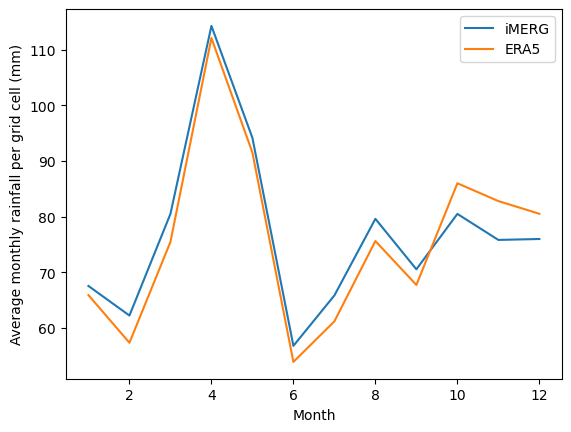

In [26]:
fig, ax = plt.subplots()

ax.plot(range(1,13), np.array(list(monthly_average.values())) / 113**2, label='iMERG')
ax.plot(range(1,13), np.array(list(monthly_average_era5.values())) / 113**2, label='ERA5')
ax.set_ylabel('Average monthly rainfall per grid cell (mm)')
ax.set_xlabel('Month')
# ax.tick_params(axis='x', rotation=90)
ax.legend()

In [6]:
"""
Script to calculate imerg quantiles
"""

import shutil
import tarfile
import tempfile
import os
import re
import numpy as np
from glob import glob
from tqdm import tqdm
from argparse import ArgumentParser

from dsrnngan import data, read_config, utils

training_range = read_config.read_config()['TRAIN']['training_range']
val_range = read_config.read_config()['VAL']['val_range']
quantile_range = [training_range[0], val_range[1]]


dates = utils.date_range_from_year_month_range(quantile_range)



In [10]:
date = dates[0] 

# for hour in range(24):

ds = load_imerg_raw(date.year, date.month, date.day, hour=0)